In [1]:
from model import CNN, TextSentimentConv1d,  ModelMix
from torch import nn
from data_loader import load_split_data
from torch.optim import SGD, Adam
from torch.utils.tensorboard import SummaryWriter
from utils import get_device

import json
import torch

torch.manual_seed(42)
torch.backends.cudnn.deterministic = True

import warnings
warnings.filterwarnings("ignore")

In [2]:
from train_model import Train

BATCH_SIZE = 128
LEARN_RATE = 0.05
EMBEDDING_DIM = 200

with open('./datainfo.json', 'r') as f:
    data = json.load(f)  
    
vocab = data["vocab"]
vocab_size = len(vocab)
writer = SummaryWriter(comment=f"Conv1d-Momentum {LEARN_RATE} {BATCH_SIZE}")

trainloader, testloader = load_split_data(data, BATCH_SIZE, .2)

In [3]:
device = get_device()
model1 = TextSentimentConv1d(vocab_size, EMBEDDING_DIM, 3, vocab)
model2 = CNN()
model = ModelMix(model1, model2)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=LEARN_RATE, momentum=0.9)

==== Iniciando entrenamiento ==== 

Los parametros a usar son
              model: ModelMix(
  (model_text): TextSentimentConv1d(
    (embedding): Embedding(8669, 200, padding_idx=1)
    (conv): Conv1d(1, 256, kernel_size=(600,), stride=(200,))
  )
  (model_image): CNN(
    (conv1): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
    (conv2_drop): Dropout2d(p=0.5, inplace=False)
    (fc1): Linear(in_features=720, out_features=1024, bias=True)
    (fc2): Linear(in_features=1024, out_features=256, bias=True)
  )
  (lineal1): Linear(in_features=512, out_features=3, bias=True)
)
              optimizer: SGD (
Parameter Group 0
    dampening: 0
    lr: 0.05
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
              criterion: CrossEntropyLoss()
              epocas: 5
              


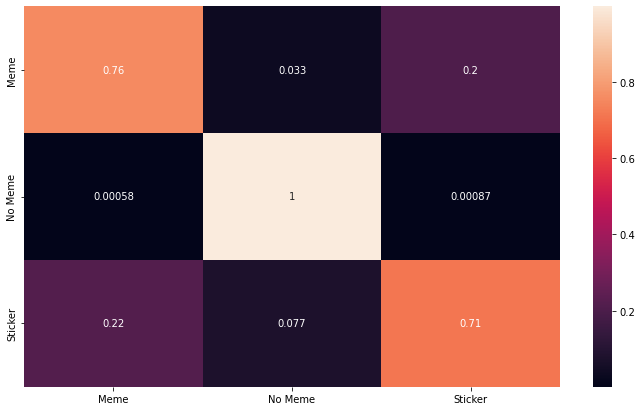

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


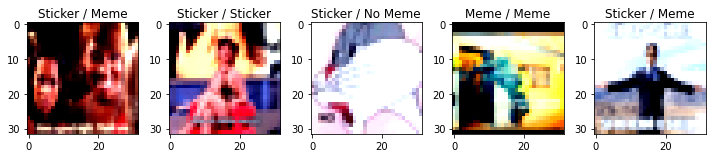

Epoch 1/5.. Train loss: 0.705.. Test loss: 0.410.. Test accuracy: 0.822

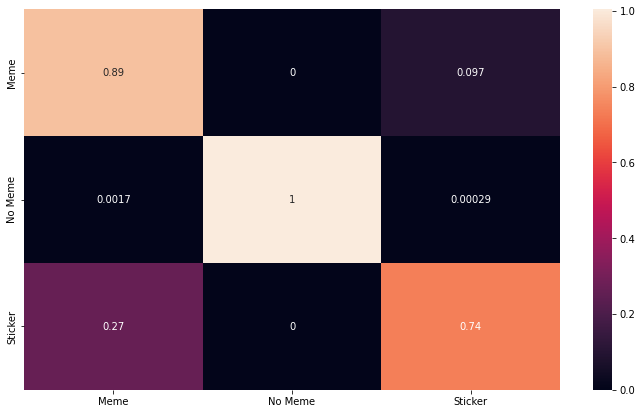

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


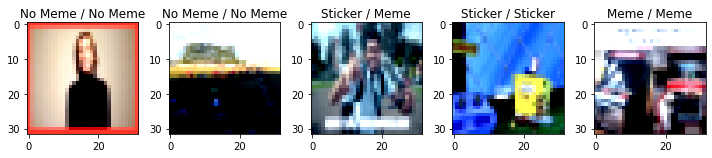

Epoch 1/5.. Train loss: 0.340.. Test loss: 0.343.. Test accuracy: 0.878

In [4]:
experiment = Train(model, optimizer, criterion,trainloader, testloader, writer=writer, show_matrix = True, show_image=True)
experiment.train_model()